In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm 

## Nan 데이터 확인

In [2]:
import pandas as pd

df = pd.read_csv("data/customerRegressionFull.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         13000 non-null  int64  
 1   Computer    13000 non-null  int64  
 2   TV          13000 non-null  int64  
 3   Cellphone   13000 non-null  int64  
 4   Software    13000 non-null  int64  
 5   Frequency3  13000 non-null  int64  
 6   Monetary3   13000 non-null  float64
 7   Monetary60  13000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 812.6 KB


In [3]:
df.head()

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
0,37,4,1,0,2,7,1.607621e+06,3.220018e+06
1,21,4,1,1,1,7,1.654844e+06,4.792484e+06
2,20,1,2,2,1,6,1.884846e+06,4.681646e+06
3,11,0,3,0,2,5,1.415478e+06,5.861252e+06
4,17,0,2,1,0,3,1.669848e+06,3.914121e+06


In [4]:
x = df[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y = df[["Monetary60"]]

## train / valid / test 분할
- 7 : 2 : 1 의 비율로 분할하였음

In [5]:
df_train = df.iloc[0:int(len(df) * 0.7)]
df_valid = df.iloc[int(len(df) * 0.7):int(len(df) * 0.9)]
df_test = df.iloc[int(len(df) * 0.9):]

In [6]:
print(len(df_train), len(df_valid), len(df_test))

9100 2600 1300


In [7]:
x_train = df_train[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y_train = df_train[["Monetary60"]]

x_valid = df_valid[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y_valid = df_valid[["Monetary60"]]

x_test = df_test[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y_test = df_test[["Monetary60"]]

## 상관계수 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69219f3860>,
      dtype=object)

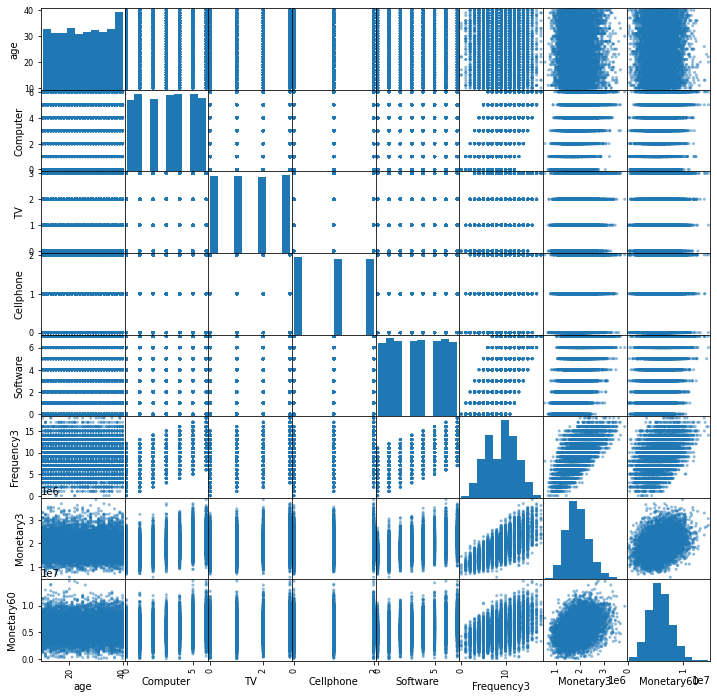

In [8]:
from pandas.plotting import scatter_matrix


scatter_matrix(df_train, figsize=(12, 12))

In [9]:
df_train.corr(method="pearson")

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
age,1.000000,-0.001052,-0.003238,0.009303,0.001331,0.001482,0.006117,0.013316
Computer,-0.001052,1.000000,-0.013761,0.001833,-0.001256,0.591545,0.424226,0.294160
TV,-0.003238,-0.013761,1.000000,-0.000837,-0.006164,0.324129,0.232489,0.142575
Cellphone,0.009303,0.001833,-0.000837,1.000000,0.029428,0.266939,0.206413,0.124040
Software,0.001331,-0.001256,-0.006164,0.029428,1.000000,0.689433,0.499916,0.342308
Frequency3,0.001482,0.591545,0.324129,0.266939,0.689433,1.000000,0.724607,0.488505
Monetary3,0.006117,0.424226,0.232489,0.206413,0.499916,0.724607,1.000000,0.348489
Monetary60,0.013316,0.294160,0.142575,0.124040,0.342308,0.488505,0.348489,1.000000


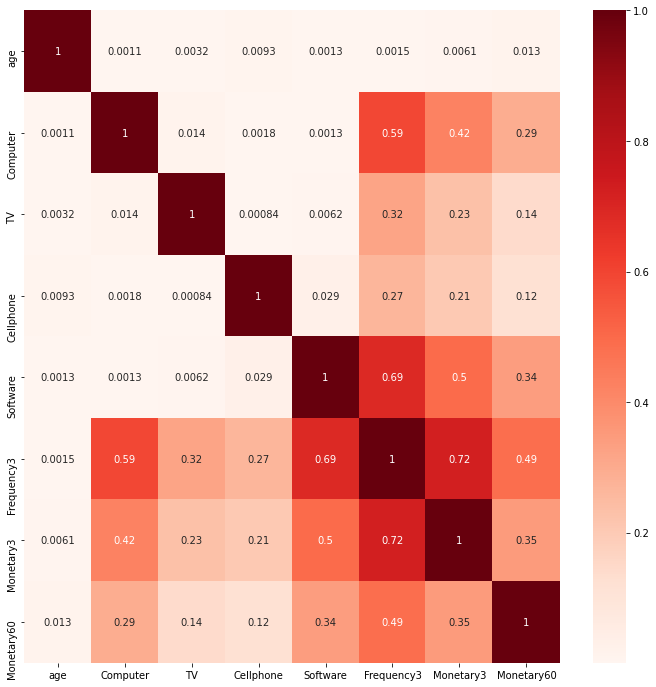

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 12))
cor = df_train.corr()
sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Reds)
plt.show()

## VIF 확인

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):
    
    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]
    
    return vif

calc_vif(x_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,6.245727
1,Computer,inf
2,TV,inf
3,Cellphone,inf
4,Software,inf
5,Frequency3,inf
6,Monetary3,24.004122


In [12]:
x_train.head(5)

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3
0,37,4,1,0,2,7,1.607621e+06
1,21,4,1,1,1,7,1.654844e+06
2,20,1,2,2,1,6,1.884846e+06
3,11,0,3,0,2,5,1.415478e+06
4,17,0,2,1,0,3,1.669848e+06


In [13]:
def check_pvalue(X_train, y_train):
    model = sm.OLS(y_train, X_train).fit()
    print(model.pvalues, "\n")
    print(max(model.pvalues))

In [14]:
X_train = sm.add_constant(x_train)

check_pvalue(X_train, y_train)

const         5.811001e-205
age            1.664865e-01
Computer       2.526294e-14
TV             5.894012e-03
Cellphone      6.155242e-03
Software       7.033435e-16
Frequency3    4.296115e-193
Monetary3      3.847175e-01
dtype: float64 

0.3847175313745014


In [15]:
X_train = X_train.drop(["Monetary3"],axis=1)

check_pvalue(X_train, y_train)

const         6.517920e-305
age            1.683754e-01
Computer       3.696374e-14
TV             7.003846e-03
Cellphone      7.425292e-03
Software       1.019111e-15
Frequency3    3.302703e-290
dtype: float64 

0.16837544803627388


In [16]:
X_train = X_train.drop(["age"], axis=1)

check_pvalue(X_train, y_train)

const          0.000000e+00
Computer       3.879937e-14
TV             7.180376e-03
Cellphone      7.137542e-03
Software       1.051409e-15
Frequency3    2.738791e-290
dtype: float64 

0.007180375883221176


In [17]:
X_train = X_train.drop(["TV"],axis=1)

check_pvalue(X_train, y_train)

const         0.000000e+00
Computer      7.679146e-02
Cellphone     6.657902e-01
Software      7.002285e-02
Frequency3    1.077276e-58
dtype: float64 

0.6657901564748244
